## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.bandwidths import bw_silverman

## Assign Weights

In [2]:
weights_bus = 0.2
weights_hosp = 0.4
weights_rest = 0.4

## Import Files

In [3]:
rest = pd.read_csv("restaurants.csv")
hosp = pd.read_csv("hospitals.csv")
bus = pd.read_csv("bus_stops.csv")

## Plot Map

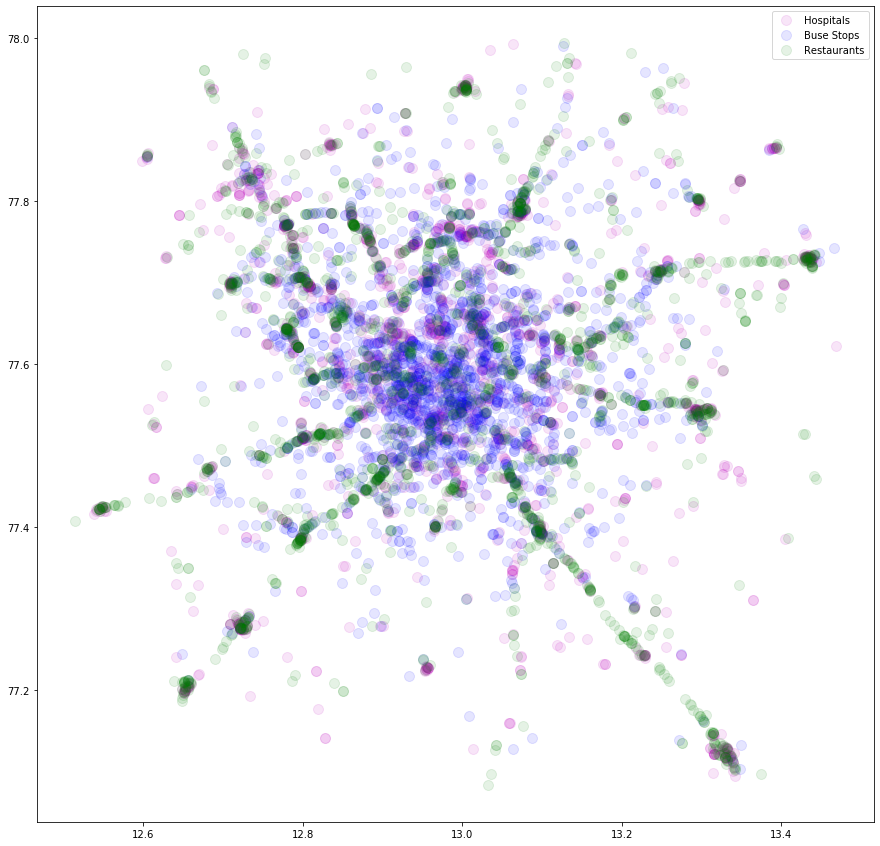

In [4]:
fig=plt.figure(figsize=(15, 15))
plt.plot(hosp['latitude'],hosp['longitude'],'mo',alpha=0.1,markersize=10,label='Hospitals')
plt.plot(bus['latitude'],bus['longitude'],'bo',alpha=0.1,markersize=10,label='Buse Stops')
plt.plot(rest['latitude'],rest['longitude'],'go',alpha=0.1,markersize=10,label='Restaurants')

plt.legend(loc='best')
plt.show()
fig.savefig('save.png')

## Load Weights to Files

In [5]:
bus['weights'] = [weights_bus]*len(bus)
bus.set_index('id', inplace=True)
hosp['weights'] = [weights_hosp]*len(hosp)
hosp.set_index('id', inplace=True)
rest['weights'] = [weights_rest]*len(rest)
rest.set_index('id', inplace=True)
joined = pd.concat([bus,rest,hosp],keys=['bus','rest','hosp'])
joined

latitude  longitude  weights
     id                                                                     
bus  d461dd24beb4b0ef4eb8f5251f14a133          12.955712  77.720346      0.2
     567e9aa5e9849f42f6161bf6b73bd47c          12.846598  77.671565      0.2
     cf2fd7e978ea8f70b790c931cb6c8ccf          12.939330  77.695316      0.2
     ca41840db8acbbc8a10e6e4c69d91c36          12.951165  77.491945      0.2
     219773e23e2d7659a5935bb63e75347f          13.197742  77.777031      0.2
...                                                  ...        ...      ...
hosp 14beb213ee9d489961df9d9113ca4e172a3688f1  12.883012  77.753886      0.4
     1a137b8a95ed022d2070a84bdd1921b91826965f  12.899623  77.482698      0.4
     99f41a10021160b21a82497d422d0130735ede40  12.967948  77.407736      0.4
     1e8f6e4407d000728e79583527aee7dd73d1cb2a  13.081428  77.634363      0.4
     304b13b4a1dbec2f289fc1685240a63e3e9a5a0d  12.894389  77.846636      0.4

[6000 rows x 3 columns]

## KD Estimator

In [6]:
bandwidth = bw_silverman(joined[['latitude','longitude']].to_numpy())
kernel = KernelDensity(bandwidth=max(bandwidth),algorithm='ball_tree', metric='haversine')
estimator = kernel.fit(joined[['latitude', 'longitude']].to_numpy(), joined[['weights']].to_numpy().squeeze())

## Score And Pick Best

In [7]:
scores = estimator.score_samples(joined[['latitude', 'longitude']].to_numpy())
joined['scores']=scores
joined.reset_index(inplace=True)
joined.sort_values('scores',inplace=True,ascending=False)
result = joined.head()
result

,level_0,id,latitude,longitude,weights,scores
1495,bus,b135301eceaf851c9c7c3efbd4de5ec0,12.957070,77.567107,0.2,2.405130
908,bus,71f1c68856adbc9e1b25010a0d1a5415,12.957209,77.568077,0.2,2.404957
2899,rest,bba72a25200bebff3f1543d3ca700a16f542c3f6,12.953921,77.568874,0.4,2.404922
888,bus,99d2b60af8c8e1340de223d22b7d0f56,12.957195,77.568295,0.2,2.404897
741,bus,76ab28bae03e2d48037ae3cefd48565e,12.960405,77.567908,0.2,2.404435


## Plot Best Points

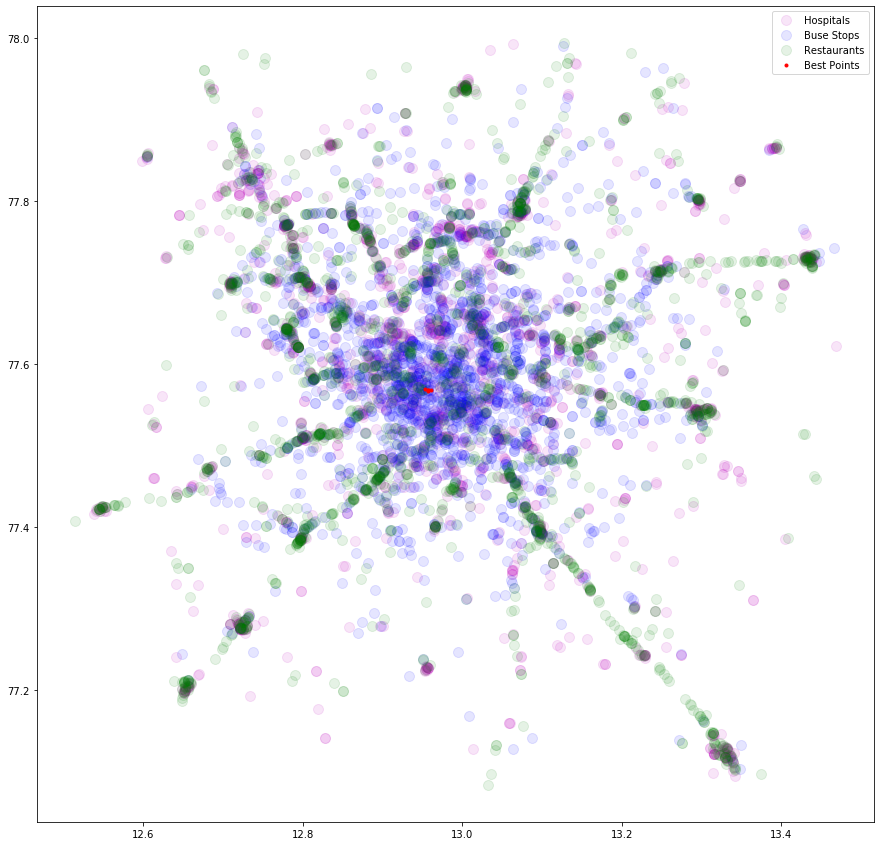

In [8]:
fig=plt.figure(figsize=(15, 15))
plt.plot(hosp['latitude'],hosp['longitude'],'mo',alpha=0.1,markersize=10,label='Hospitals')
plt.plot(bus['latitude'],bus['longitude'],'bo',alpha=0.1,markersize=10,label='Buse Stops')
plt.plot(rest['latitude'],rest['longitude'],'go',alpha=0.1,markersize=10,label='Restaurants')
plt.plot(result['latitude'],result['longitude'],'ro',markersize=3,label='Best Points')

plt.legend(loc='best')
plt.show()
fig.savefig('save_final.png')